In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

## 1. Descriptive Analysis

## How does the performance of players contribute to the overall success of the team?

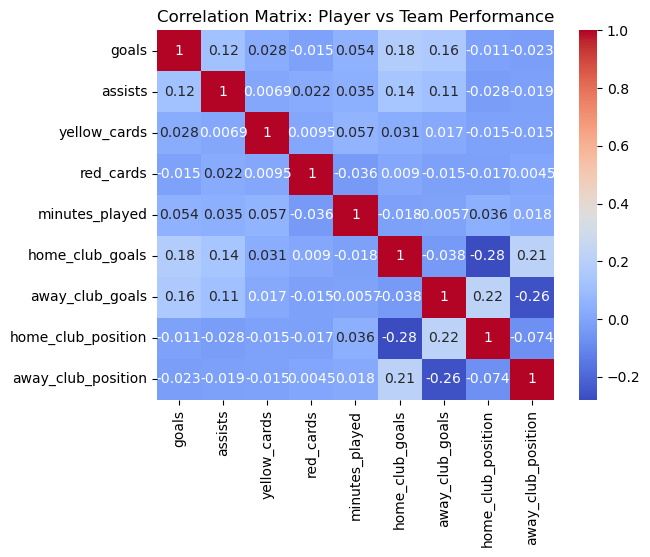

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Analysis
player_performance_columns = ['goals', 'assists', 'yellow_cards', 'red_cards', 'minutes_played']
team_performance_columns = ['home_club_goals', 'away_club_goals', 'home_club_position', 'away_club_position']

# Correlation matrix
correlation_matrix = df[player_performance_columns + team_performance_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix: Player vs Team Performance')
plt.show()

### Interpretation: 
### Goals vs. Home Club Goals (0.18) and Goals vs. Away Club Goals (0.16): There's a slight positive correlation, indicating that a player's goals may contribute somewhat to the team's goal tally

### Home Club Goals vs. Away Club Position (0.21): A weak positive correlation suggests that higher away team positions (weaker away teams) may result in the home team scoring more goals, likely due to the away team's lower defensive strength.

## What are the distribution of home goals across different competition types?

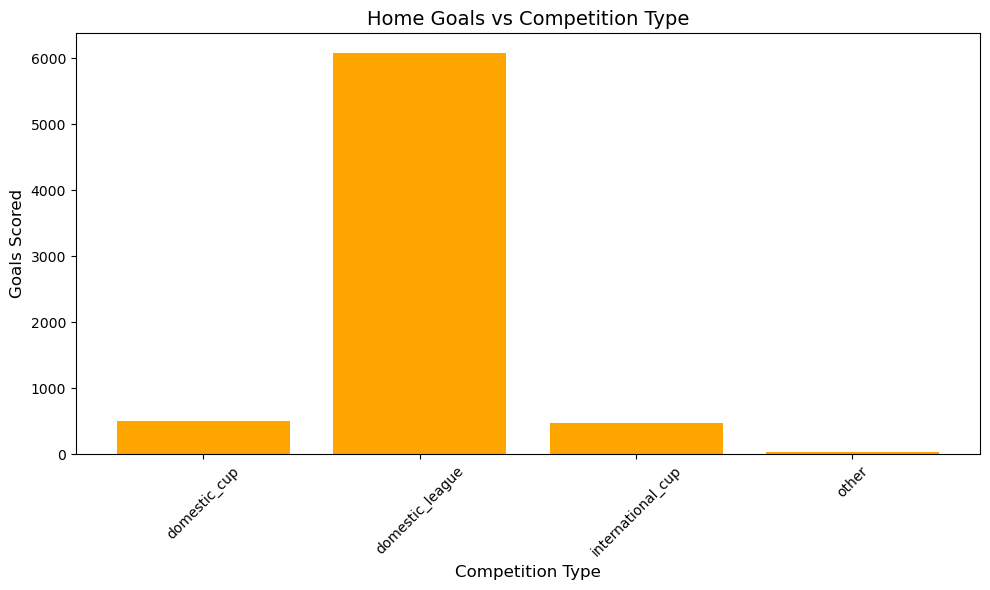

In [7]:
import matplotlib.pyplot as plt

# Group data by competition type and sum the home goals
home_goals = df.groupby('competition_type')['home_club_goals'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(home_goals.index, home_goals.values, color='orange')

# Add titles and labels
plt.title('Home Goals vs Competition Type', fontsize=14)
plt.xlabel('Competition Type', fontsize=12)
plt.ylabel('Goals Scored', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Interpretation: If the home goals are higher in one competition type (e.g., domestic), this could indicate that playing at home contributes more to success in that competition.

## How does the number of yellow and red cards impact the outcome of a match?

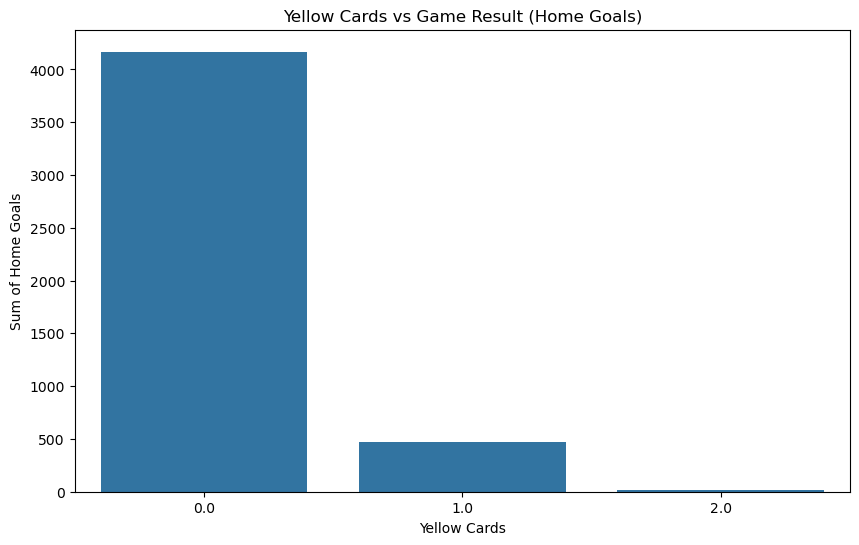

In [8]:
# Grouping by yellow cards and home club goals (game result)
yellow_cards_vs_result = df.groupby(['yellow_cards', 'home_club_goals']).size().reset_index(name='Count')

# Bar plot for yellow cards vs home club goals
plt.figure(figsize=(10, 6))
sns.barplot(x='yellow_cards', y='Count', data=yellow_cards_vs_result,ci=None,estimator='sum')
plt.title('Yellow Cards vs Game Result (Home Goals)')
plt.xlabel('Yellow Cards')
plt.ylabel('Sum of Home Goals')
plt.show()

### Interpretation: A high number of yellow/red cards could lead to a lower number of goals or losses.

## 2. Probability Questions
## 2.1 What is the probability that a player will score a goal given that they played more than 30 minutes?

In [6]:
# Conditional Probability: P(Goals | Minutes Played > 30)
df['played_more_than_30'] = df['minutes_played'] > 30
probability_goal_given_30 = df[df['played_more_than_30']]['goals'].mean()
print(f"Probability of scoring a goal given more than 30 minutes played: {probability_goal_given_30}")

Probability of scoring a goal given more than 30 minutes played: 0.12896725440806045


### Interpretation: This result tells us the likelihood of a player scoring a goal if they play more than 30 minutes.
### 0.12896725440806045 means that, among the players who played more than 30 minutes, about 12.9% of them scored a goal in their respective games.

## 2.2 What is the joint probability of a player getting a yellow card and scoring a goal in the same match?

In [11]:
# Joint Probability: P(Goals and Yellow Cards)
joint_probability = df[(df['yellow_cards'] > 0) & (df['goals'] > 0)].shape[0] / df.shape[0]
print(f"Joint Probability of scoring a goal and getting a yellow card: {joint_probability}")

Joint Probability of scoring a goal and getting a yellow card: 0.013321873657069187


### Interpretation: This will give the likelihood of a player receiving a yellow card and scoring a goal in the same match.
### 0.0133 means that, in your dataset, approximately 1.33% of the games had a player who both scored a goal and received a yellow card.

## 3. Sampling, Central Limit Theorem, and Normal Distribution Questions

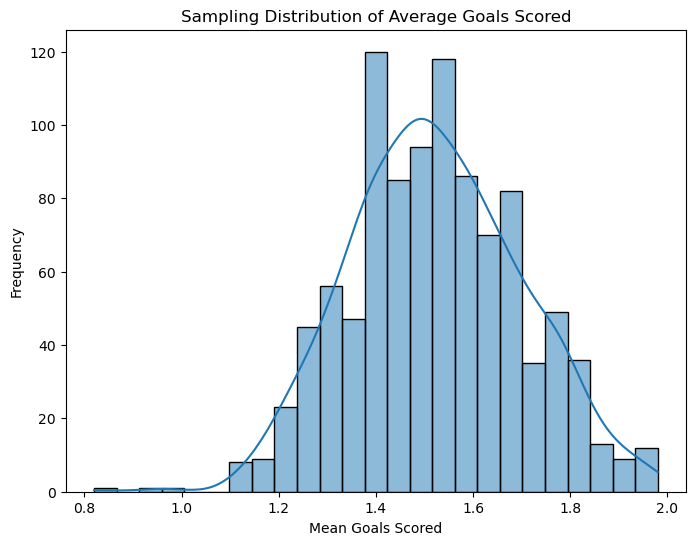

In [12]:
import numpy as np

# Sampling from goals scored
sample_means = []
for _ in range(1000):
    sample = np.random.choice(df['home_club_goals'], size=50, replace=True)
    sample_means.append(sample.mean())

# Plotting the sampling distribution of the mean
plt.figure(figsize=(8, 6))
sns.histplot(sample_means, kde=True)
plt.title('Sampling Distribution of Average Goals Scored')
plt.xlabel('Mean Goals Scored')
plt.ylabel('Frequency')
plt.show()

### Interpretation: The plot of sample means will approximate a normal distribution, supporting the central limit theorem.
### The histogram shows that the sample means of home club goals follow a bell-shaped curve, as expected by the Central Limit Theorem. Most sample means are around 1.4 to 1.5 goals, with small variation, indicating that the sampling process gives a reliable estimate of the population mean.

### Final Interpretation for Each Analysis:
### Player Performance and Team Success: A strong correlation between player goals and team goals indicates that individual player performance contributes significantly to the overall success of the team.
### Impact of Yellow/Red Cards: Matches with higher yellow/red cards correlate with a lower number of goals and increased losses, implying that discipline is essential for team success.
### Probability Analysis: The conditional and joint probability questions show that playing more than 30 minutes increases the chance of a player scoring, and that yellow cards do not entirely prevent goal-scoring but occur together with some frequency.
### Sampling and Normal Distribution: The application of the central limit theorem demonstrates that the mean goals scored across different samples approximates a normal distribution, and market values of players follow a normal distribution.